In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_test='/content/drive/My Drive/od_alone'
categories=['gl','norm']
training = []

def create():
    for cat in categories:
        path = os.path.join(path_test, cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (224, 224))
            training.append([new_array, class_num])

create()


count1=0
count2=0
for i in range(len(training)):
    if training[i][1]==0:
        count1=count1+1
    elif training[i][1]==1:
        count2=count2+1

print(count1,count2)

Mounted at /content/drive
101 141


In [ ]:
import random
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [ ]:


np.random.shuffle(training)
X = []
y = []

for features, label in training:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 224, 224, 3)
X = X.astype('float32') / 255.0
Y = to_categorical(y, 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(512, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(512, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=3e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=2, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

y_pred = np.argmax(model.predict(X_test), axis=1)


Epoch 1/50
7/7 - 26s - loss: 0.7520 - accuracy: 0.4767 - val_loss: 0.6909 - val_accuracy: 0.6939 - 26s/epoch - 4s/step
Epoch 2/50
7/7 - 1s - loss: 0.6870 - accuracy: 0.6995 - val_loss: 0.6674 - val_accuracy: 0.6327 - 1s/epoch - 184ms/step
Epoch 3/50
7/7 - 1s - loss: 0.6110 - accuracy: 0.7358 - val_loss: 0.4296 - val_accuracy: 0.8776 - 1s/epoch - 176ms/step
Epoch 4/50
7/7 - 1s - loss: 0.4744 - accuracy: 0.7461 - val_loss: 0.2368 - val_accuracy: 0.9796 - 1s/epoch - 182ms/step
Epoch 5/50
7/7 - 1s - loss: 0.1484 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000 - 1s/epoch - 188ms/step
Epoch 6/50
7/7 - 1s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 9.1604e-05 - val_accuracy: 1.0000 - 1s/epoch - 179ms/step
Epoch 7/50
7/7 - 1s - loss: 3.9439e-04 - accuracy: 1.0000 - val_loss: 5.0941e-06 - val_accuracy: 1.0000 - 1s/epoch - 176ms/step
Epoch 8/50
7/7 - 1s - loss: 8.7340e-06 - accuracy: 1.0000 - val_loss: 2.7978e-07 - val_accuracy: 1.0000 - 1s/epoch - 186ms/step
Epoch 9/50
7/7 - 1s -

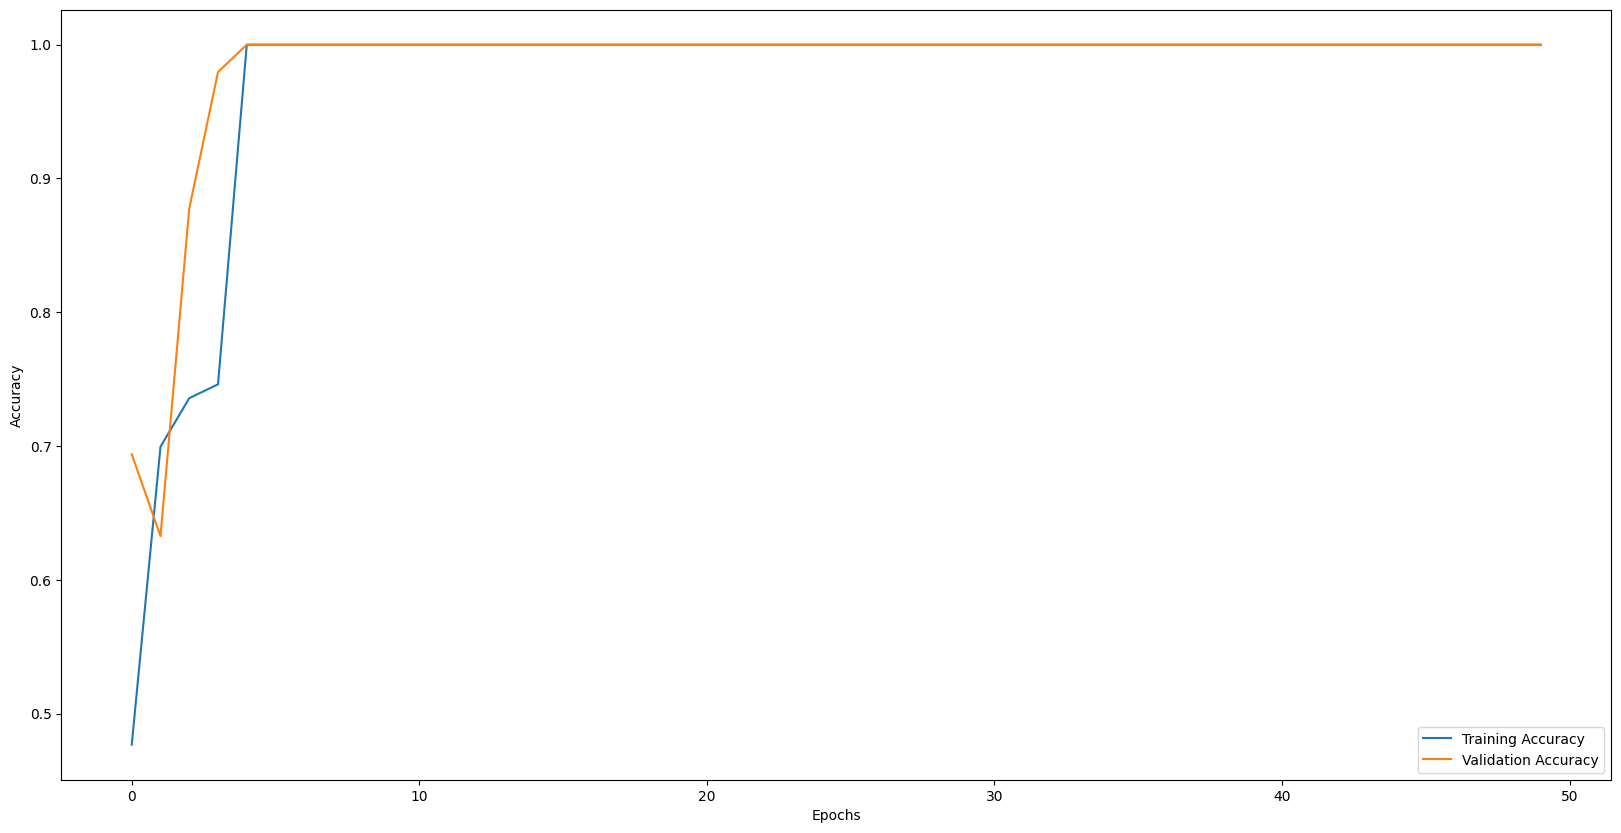

In [ ]:
plt.figure(figsize=(20,10))
# Plotting accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[23  0]
 [ 0 26]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        26

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

